ベイズ最適化入門  
https://github.com/Ma-sa-ue/practice/blob/master/machine%20learning(python)/bayeisan_optimization.ipynb  
The original code is based on python2. A few modifications to fit it to python3 are needed.

In [1]:
%matplotlib inline
%run ../common/homemade_GPR.py
%run ../common/homemade_BO.py
import sys
import matplotlib.pyplot as plt
np.random.seed(seed=123)

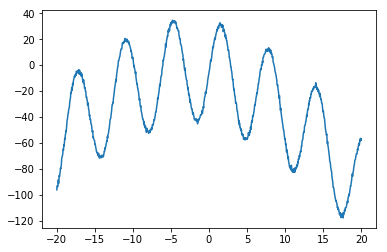

In [2]:
#Define data, supervised data
def x2y(x):
    f = 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
    return f
#
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx)
y = list(map(x2y,x)) #for python3
y = np.array(y)
plt.plot(x, y) #### plot true data
plt.show()

In [3]:
#Define GPR and Bayesian opt.
GPR = Gaussian_Process_Regression()
#GPR.a1_RBF = 0.0
typical_scale=0.1
GPR.a1_RBF = 1.0
GPR.a2_RBF = typical_scale**2
GPR.a1_exp = 0.0
GPR.a2_exp = typical_scale
GPR.a1_const = 0.0
print(GPR.a1_RBF, GPR.a2_RBF, GPR.a1_exp, GPR.a2_exp, GPR.a1_const)
#
BO = Bayesian_opt()
BO.acqui_name = 'EI'
#BO.acqui_name = 'PI'
#BO.acqui_name = 'UCB'
print('# The choice of acquisition function: ',BO.acqui_name)

1.0 0.010000000000000002 0.0 0.1 0.0
# The choice of acquisition function:  EI


epoch =  0 , x_point, maxval = 5.665665665665667,  10.752429826046175
epoch =  1 , x_point, maxval = -20.0,  10.752429826046175
epoch =  2 , x_point, maxval = -7.6676676676676685,  10.752429826046175
epoch =  3 , x_point, maxval = 20.0,  10.752429826046175
epoch =  4 , x_point, maxval = -13.153153153153152,  10.752429826046175
epoch =  5 , x_point, maxval = -2.4224224224224216,  10.752429826046175
epoch =  6 , x_point, maxval = 16.156156156156158,  10.752429826046175
epoch =  7 , x_point, maxval = 0.3403403403403402,  10.752429826046175
epoch =  8 , x_point, maxval = -16.236236236236238,  10.752429826046175
epoch =  9 , x_point, maxval = -0.5005005005005003,  10.752429826046175
epoch =  10 , x_point, maxval = 1.7417417417417411,  29.968012726688915
epoch =  11 , x_point, maxval = -5.025025025025025,  32.35886906424684
epoch =  12 , x_point, maxval = -4.704704704704705,  33.344168467216576
epoch =  13 , x_point, maxval = 13.593593593593596,  33.344168467216576
epoch =  14 , x_point, max

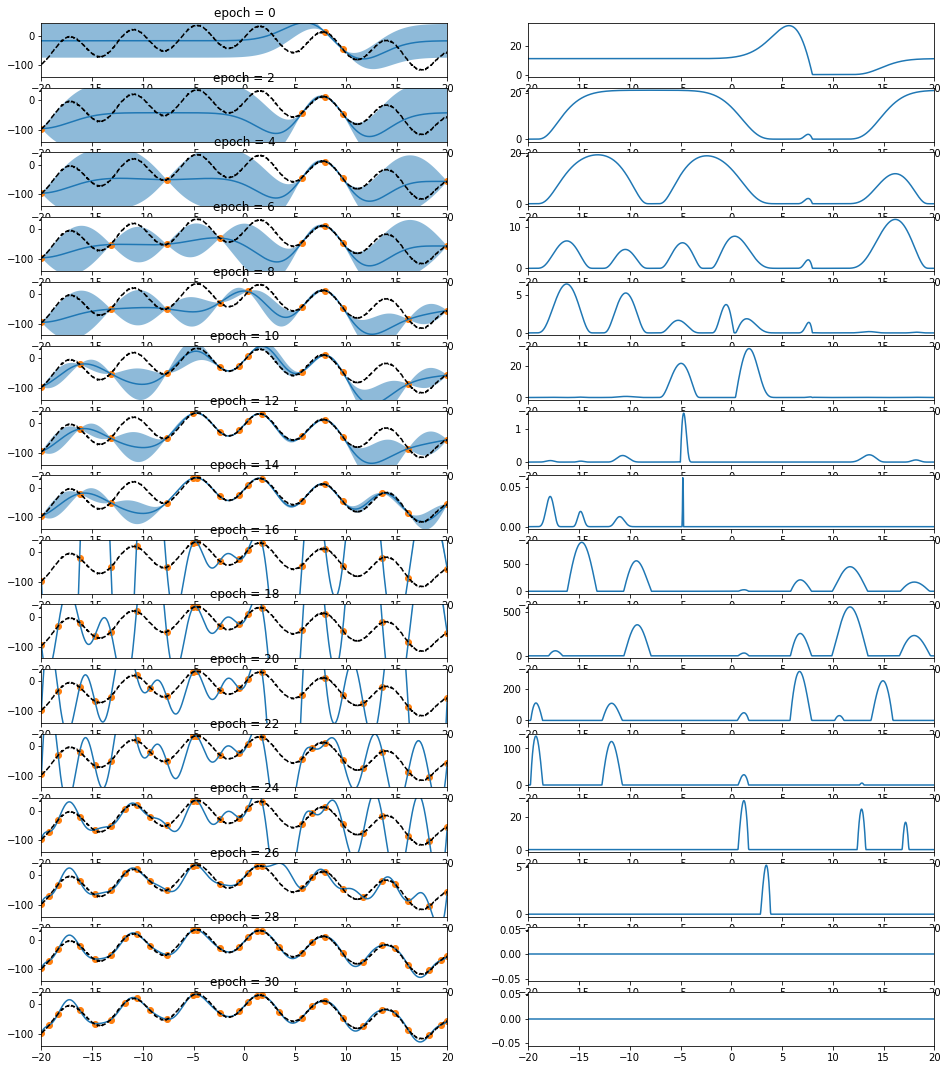

# Actual value of maximum is [34.65978763]
# Got value in the Bayesian_opt is 35.099595689793645
# Optimization is finished.


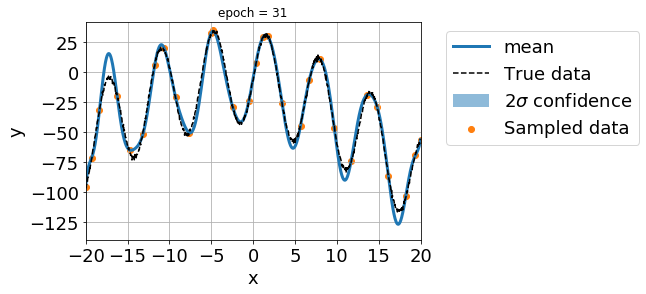

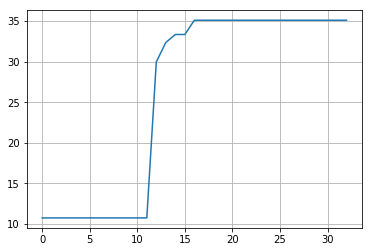

In [4]:
#Definition of array as the initial condition
x_sample_init = np.array([])
y_sample_init = np.array([])
Ninitial = 2
for i in range(Ninitial):
    x_point = np.random.uniform(xmin,xmax) #Initial point is randomely chosen
    x_sample_init = np.append(x_sample_init,x_point) 
    y_point = x2y(x_point) 
    y_sample_init = np.append(y_sample_init,y_point) 
#
Nepoch = 32 #Number of optimization
nplotevery = Nepoch//16 #Plot the results in every this number

mean, std, x_point, y_point, maxval_list = DO_BO(GPR, BO, x2y, x, x_sample_init, y_sample_init, Nepoch, nplotevery, answer_is_there=True)

plt.figure()
plt.plot(maxval_list)
plt.grid()
plt.show()